<div class="usecase-title">UC00150_Waste_Efficiency_Argyle_Square_case_study</div>

<div class="usecase-authors"><b>Authored by: Peregrin J Ryan</b></div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

Melbourne is the host to many events, both national (Melbourne Cup) and international (Tennis Open, Formula One). Because of this the Melbourne city infrastructure will receive far more stress on its infrastructure. One of the most important and most visual for tourists and citizens is waste management as overflowing bins and rubbish in the street makes the city appear worse and may give the city a poor reputation as well as having the potential for pollution of the Yarra river or local flora and fauna. Because of this, this document will investigate how the waste is managed in Melbourne inner city / city. It will look at when pedestrians are active and when bins are most likely to be used and emptied as well as the time they are full. The goal is to have some way of measuring a case study of waste management near the main melbourne CBD during less active times to find if the waste management in melbourne is capable of handling more busy times and events.

<div class="usecase-section-header">What this use case will teach you</div>

By going through this use case and engaging with it's content as well as running the code you will have learnt how to do each of these things:

- Collect data from the Melbourne open data (MOP) using API v2.1 GET request.
- Clean and prepare the data needed.
  - fixing missing values and learning why 12% of the bins data was missing.
- Find the bin usage levels throughout the day, week and months.
- The times when pedestrians are most likely to see and use the public bins.
- When are the times a bin is most likely to be full.
- And learn if the waste management in Argyle Square is adequate for the needs of the city.

<div class="usecase-section-header">Introduction and background relating to problem:</div>

Litter from large events or even the infrastructure stress of being the host to so many people within a city puts weight on the infrastructure. When it fails it causes many public issues, like trash piling or litter going into waterways and into nature. Because of this it is paramount for cities like melbourne to put effort into looking after waste.




By evaluating and looking at publicly available data we can use bin data collected from Argyle square as a case study to see how these bins operate and if they are effective at mitigating pollution. We will also use surveyed data to see how the bins are maintained and pedestrian data to see when pedestrians are likely to use the bins. This is to see how on average melbourne's waste infrastructure is working currently and make an assessment if Melbournes waste management can handle more use due to public events.




So this report will look at:
- Average fill level.
- When are bins 'full'.
- When are bins emptied.
- What days and what times are bins filled more.
- What times are there more pedestrians.
- When do pedestrians see or interact with full bins.




This is to then make insights into:
- Are bins available to pedestrians at busy times.
- Are bins emptied enough to meet needs.
  - What level are the bins at on average and is it already at its limits without large public events.
- Are the conditions of the bins good enough to support the current needs.


## Datasets used:
Dataset 1: https://data.melbourne.vic.gov.au/explore/dataset/netvox-r718x-bin-sensor/table/?disjunctive.dev_id&sort=-sensor_name


Dataset 2: https://data.melbourne.vic.gov.au/explore/dataset/street-furniture-including-bollards-bicycle-rails-bins-drinking-fountains-horse-/table/?sort=location_desc


## 1 Import packages
For this project we will need to import a series of packages, these can be installed using the `! pip install` command. Many of these are still easily accessible and maintained at the time of writing.

The only one that is different is the `API_store`. This is a separate file stored that contains the API key (stored as `API = <Insert your key here>`). Simply create the file in the same folder as this one and it should be imported without any issues.

In [1]:
# Imports needed to request and collect data from API
import requests
import pandas as pd
from io import StringIO
# Create this as a local file to store your API key
import API_store
# For data wrangling
import matplotlib.pyplot as plt

## 2 Data Collection
The first step in the data collection process is to make getting the API data as simple as possible, so we will create a function to make getting the data easy.

In [2]:
# This is the function to collect the data from the API
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    apikey = API_store.API
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

Now we simply collect the data by calling the API with the function we just wrote:

In [3]:
# dataset_ids = ['netvox-r718x-bin-sensor','pedestrian-counting-system-monthly-counts-per-hour']
# bin_sensor_df = collect_data(dataset_ids[0])
# pedestrian_counting_df = collect_data(dataset_ids[1])


In [4]:
# *** REMOVE ON RELEASE *** - Use to save time from pulling data from API
bin_sensor_df = pd.read_csv('bin_sensor_df.csv')
pedestrian_counting_df = pd.read_csv('pedestrian_counting_df.csv')

## 3 Data Wrangling
Now that we have access to the data we need to organise it and prepare it for usage. The first thing we will do is check the length of each one so we know how much data we are working with. Then we will look at the first few values to get an idea of what is stored in the data. We will then check for any missing values or any clear issues.

### 3.1 Check imported data

In [5]:
# Print the length of each dataset, can be compared to the API website to see if it matches and to know the size of our datasets
print(f'The datasets collected are: \n-bin_sensor_df: length {len(bin_sensor_df)}\n',
      f'-pedestrian_counting_df: length {len(pedestrian_counting_df)}')

The datasets collected are: 
-bin_sensor_df: length 969611
 -pedestrian_counting_df: length 2257076


Now we look at the first few values and understand what we have in our dataset:

In [6]:
bin_sensor_df.head(3)

,dev_id,time,temperature,distance,filllevel,battery,lat_long,sensor_name,fill_level
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,65535.0,255.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,-8877.0
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,200.0,90.0,3.6,"-37.8031969, 144.9652732",r718x-bin sensor 2,72.0
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,468.0,40.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,35.0


In [7]:
pedestrian_counting_df.head(3)

,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,432020210929,43,2021-09-29,20,2,6,8,UM2_T,"-37.79844526, 144.96411782"
1,92020211116,9,2021-11-16,20,30,22,52,Col700_T,"-37.81982992, 144.95102555"
2,58220220303,58,2022-03-03,2,26,27,53,Bou688_T,"-37.81686075, 144.95358075"


Now we need to check to see if any of our data is missing values, this is just done by a quick check with `isnull()` from pandas.

In [8]:
print("Bin data: ")
print("are any values null-->",bin_sensor_df.isnull().values.any())
print("Pedestrian data: ")
print("are any values null-->",pedestrian_counting_df.isnull().values.any())

Bin data: 
are any values null--> True
Pedestrian data: 
are any values null--> False


From this check we can see that we have no null values in the pedestrian data set. This is great, but we need to know how much data is missing from our bin data and where it’s missing.

In [9]:
# Print a formatted readout to see what values are missing from each column, then give a percentage of missing data
print(f"Missing data:\n{bin_sensor_df.isnull().sum()}\n------\n",
      f"Total missing values: {len(bin_sensor_df[bin_sensor_df.isnull().any(axis=1)])}\nTotal values: {len(bin_sensor_df)}",
      f"\nPercent of missing values: {round((len(bin_sensor_df[bin_sensor_df.isnull().any(axis=1)])/len(bin_sensor_df))*100,2)}%")

Missing data:
dev_id              0
time                0
temperature        78
distance           78
filllevel          78
battery            78
lat_long       125591
sensor_name    125591
fill_level         78
dtype: int64
------
 Total missing values: 125660
Total values: 969611 
Percent of missing values: 12.96%


We are missing a very sizable amount of data in our dataset, almost 13% of the data. So rather than just dropping it let’s look into it. Maybe we can gain some insight as to why we are missing the data and we can check if it's important data that's missing.

First lets create a smaller data frame of just the missing values and call it `bin_sensor_missing_df`:

In [10]:
bin_sensor_missing_df = bin_sensor_df[bin_sensor_df["sensor_name"].isnull()]
bin_sensor_missing_df

,dev_id,time,temperature,distance,filllevel,battery,lat_long,sensor_name,fill_level
3,r718x-6f10,2024-10-13T03:03:40+00:00,22.7,202.0,89.0,3.6,NaN,NaN,72.0
5,r718x-6f10,2024-10-13T04:03:40+00:00,22.5,202.0,89.0,3.6,NaN,NaN,72.0
8,r718x-6f10,2024-10-06T04:03:29+00:00,22.1,203.0,89.0,3.6,NaN,NaN,72.0
11,r718x-6f33,2024-09-21T16:52:11+00:00,12.0,201.0,89.0,3.6,NaN,NaN,72.0
12,r718x-6f10,2024-09-21T17:03:06+00:00,19.9,203.0,89.0,3.6,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...
969582,r718x-6f10,2025-04-01T03:16:24+00:00,24.0,200.0,90.0,3.6,NaN,NaN,72.0
969589,r718x-6f33,2025-04-01T03:46:22+00:00,25.4,238.0,88.0,3.6,NaN,NaN,67.0
969590,r718x-6f10,2025-04-01T03:46:24+00:00,24.2,201.0,89.0,3.6,NaN,NaN,72.0
969599,r718x-6f10,2025-04-01T04:46:24+00:00,24.5,2322.0,0.0,3.6,NaN,NaN,-218.0


### 3.2 Insight into the missing data

We have an interesting set of missing data, seemingly the majority of our missing data is in relation to the `sensor_name` and `lat_long` and they are equally long. There is a small amount of data loss with the null values but we can re-address those after we find out why we are missing such a large amount of data. Clearly, most of them still have the important `filllevel` data we need for our analysis so we should look into the missing data. The first step is to see if this data loss happened during a specific period of time, maybe a server went down or there was a larger error with the sensors.

### 3.2.1 When did we lose data?
This is to see if our lost data is recent, meaning it is an active problem and should be included in our analysis into the efficiency of the waste management at Argyle Square. Or if it is a fixed issue that only occurs in a small window of time. If this data is also older then we can know if it is as relevant to our investigation.

In [11]:
print(f"The first time in our lost data is: ",bin_sensor_missing_df["time"].min(),
      f"\nThe most recent time is: ", bin_sensor_missing_df["time"].max())

The first time in our lost data is:  2023-02-26T08:22:26+00:00 
The most recent time is:  2025-04-01T05:16:24+00:00


From this quick check we can see that the data loss has happened historically but also recently. Because of this we should look into another cause. Since these sensors use battery life there might be a chance that before a sensor goes offline it pings its fill level before going down. So let's look at the battery levels plotted along the timeline of our dataset. This gives us an insight as to 1. How long have we been having this issue and is it consistent and 2. Is there a fluctuation in the battery percentage or is it all low values (before the sensor goes down).

### 3.2.2 Does this have something to do with batery life?
Let's do this with a scatter plot for each ping. We can plot the x axis as our `time` and the `battery` as the y axis so we can see if there are any jumps or find consistent patterns. Before we do this though we also need to check if the `time` we have stored is a correct date time value and if not convert it to a type that will work.

In [12]:
# To visualise this we need to set the datetime to a proper value
bin_sensor_missing_df.time.dtype
# dtype('O') doesnt work

dtype('O')

Here we can see that we have `dtype('0')` this is a date time value, but unfortunately it is missing a standard. But we can use pandas `to_datetime` to give it a UTC value, that way `matplotlib` knows how to plot the data out.

In [13]:
bin_sensor_missing_df['time'] = pd.to_datetime(bin_sensor_missing_df['time'], utc=True)
print(f"This changes the value so it will work: {bin_sensor_missing_df.time.dtype}\n\n") 

This changes the value so it will work: datetime64[ns, UTC]




/tmp/ipykernel_57971/1939983378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_sensor_missing_df['time'] = pd.to_datetime(bin_sensor_missing_df['time'], utc=True)


Now that our data is ready we can create a our visualisation of `battery` life of each entry along the `time` the data point was created:

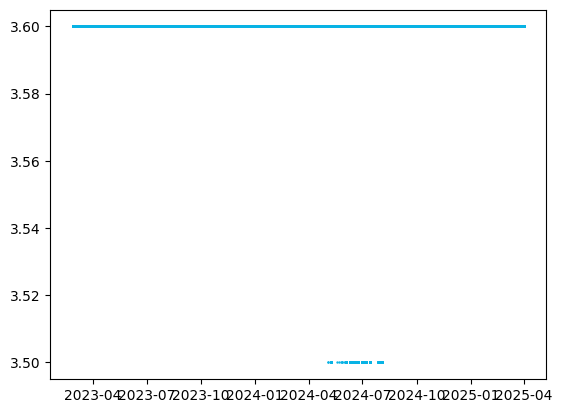

In [14]:
# Battery visualisation
x = bin_sensor_missing_df["time"]
y = bin_sensor_missing_df["battery"]
plt.scatter(x, y, s=0.5,color='#08b3e5')
plt.show() 

This is very interesting, what this shows us is that the sensors only fail to report their `lat_long` and `sensor_name` when they reach around 3.6-3.5% battery life. This supports the previous hypothesis that sensors ping the server before they go down but with such little battery life or some other configuration they do not provide the `lat_long` and `sensor_name` but still produce their data. 


Lets quickly check this against the main data set, since if they have lower data values then that might reveal some more information. Or challenge the evidence we have collected.

In [15]:
print(f"The lowest records of battery life in the main dataset are: {bin_sensor_df['battery'].min()}")

The lowest records of battery life in the main dataset are: 3.5


Since this shows that the lowest `battery` reading in the data set is 3.5% this confirms our assumption, that is the lowest it can go before dropping out. It provides some information before going down. That means we should re-organise the data since it is no longer ‘missing’ but rather it is from sensors that ran out of battery. So I will create a new data frame for Out Of Battery or `oob_bin_sensors` where we can change the `sensor_name` to OOB since we didn't lose the data and it still might contain good data. But we want to remove the `null` values. Let's also change the `lat_long` to another value that can easily be filtered out if we need it but still marks the data as no longer lost.

In [16]:
oob_bin_sensor = bin_sensor_missing_df
oob_bin_sensor['sensor_name'] = oob_bin_sensor['sensor_name'].fillna('OOB')
# Filling the lat_ling with the approximation of the middle of the park
oob_bin_sensor['lat_long'] = oob_bin_sensor['lat_long'].fillna(0)

/tmp/ipykernel_57971/1797077674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oob_bin_sensor['sensor_name'] = oob_bin_sensor['sensor_name'].fillna('OOB')
/tmp/ipykernel_57971/1797077674.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oob_bin_sensor['lat_long'] = oob_bin_sensor['lat_long'].fillna(0)
/tmp/ipykernel_57971/1797077674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [17]:
oob_bin_sensor.head(3)

,dev_id,time,temperature,distance,filllevel,battery,lat_long,sensor_name,fill_level
3,r718x-6f10,2024-10-13 03:03:40+00:00,22.7,202.0,89.0,3.6,0,OOB,72.0
5,r718x-6f10,2024-10-13 04:03:40+00:00,22.5,202.0,89.0,3.6,0,OOB,72.0
8,r718x-6f10,2024-10-06 04:03:29+00:00,22.1,203.0,89.0,3.6,0,OOB,72.0


### 3.2.3 Are the sensors even functional when failing?
Now we have figured out the cause of the data loss, the fact that the sensors often lose battery and can't give a full report raises a good question. What if this data is not good? We should see the `filllevel` and `temperature` and check if there is any outliers or bad data within. We should be remove anything that will skew our data.

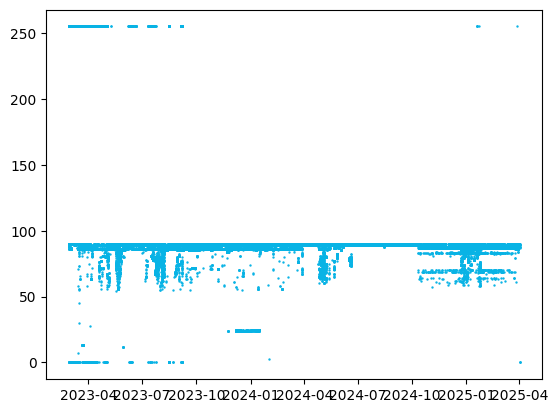

In [18]:
# filllevel visualisation
x = oob_bin_sensor["time"]
y = oob_bin_sensor["filllevel"]
plt.scatter(x, y, s=0.5,color='#08b3e5')
plt.show() 

In [19]:
print(f"The lowest records of filllevel in the OOB dataset are: {oob_bin_sensor['filllevel'].min()}",
      f"\nThe highest records of filllevel in the OOB dataset are: {oob_bin_sensor['filllevel'].max()}")

The lowest records of filllevel in the OOB dataset are: 0.0 
The highest records of filllevel in the OOB dataset are: 255.0


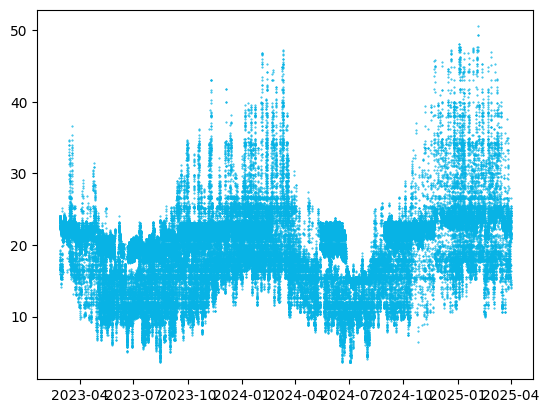

In [20]:
# temperature visualisation
x = oob_bin_sensor["time"]
y = oob_bin_sensor["temperature"]
plt.scatter(x, y, s=0.2,color='#08b3e5')
plt.show() 

In [21]:
print(f"The lowest records of temperature in the OOB dataset are: {oob_bin_sensor['temperature'].min()}",
      f"\nThe highest records of temperature in the OOB dataset are: {oob_bin_sensor['temperature'].max()}")

The lowest records of temperature in the OOB dataset are: 3.6 
The highest records of temperature in the OOB dataset are: 50.5


What we know now is *why* the sensors fail. Its due to their battery dropping and they make one last call home before going offline. Now those visualusations indicate that the data does have some outliers. But this might not be caused by *just* the out of battery bins. So lets check the data on the full set and if they share the same problems we can merge them together.
### 3.2.4 Merging the data

we can finally merge our `oob_bin_sensor_clean` with the main dataset through the `.update` function since the index is still the same. This means our “bad” data can easily be removed. Then we will have cleaned up our data and are ready to move onto the visualisation step with minimal data loss.

In [22]:
bin_sensor_df_norm = bin_sensor_df.copy()
bin_sensor_df_norm.dropna()

,dev_id,time,temperature,distance,filllevel,battery,lat_long,sensor_name,fill_level
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,65535.0,255.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,-8877.0
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,200.0,90.0,3.6,"-37.8031969, 144.9652732",r718x-bin sensor 2,72.0
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,468.0,40.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,35.0
4,r718x-6f31,2024-10-13T04:02:36+00:00,23.0,200.0,74.0,3.6,"-37.8022594, 144.9659489",r718x-bin sensor 19,72.0
6,r718x-6f0b,2024-10-06T04:01:58+00:00,22.5,65535.0,255.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,-8877.0
...,...,...,...,...,...,...,...,...,...
969605,r718x-6f34,2025-04-01T05:02:22+00:00,23.5,201.0,74.0,3.6,"-37.802165, 144.9661423",r718x-bin sensor 20,72.0
969606,r718x-6773,2025-04-01T05:12:35+00:00,21.4,255.0,255.0,3.6,"-37.8022471, 144.9665562",r718x-bin sensor 5,65.0
969608,r718x-6f16,2025-04-01T05:21:03+00:00,22.7,202.0,74.0,3.6,"-37.8028794, 144.9662728",r718x-bin sensor 17,72.0
969609,r718x-6f06,2025-04-01T05:23:55+00:00,21.7,203.0,89.0,3.6,"-37.8032959, 144.9661516",r718x-bin sensor 13,72.0


In [23]:
print(f"The lowest records of filllevel in the normal dataset are: {bin_sensor_df_norm['filllevel'].min()}",
      f"\nThe highest records of filllevel in the normal dataset are: {bin_sensor_df_norm['filllevel'].max()}")
print(f"The lowest records of temperature in the normal dataset are: {bin_sensor_df_norm['temperature'].min()}",
      f"\nThe highest records of temperature in the normal dataset are: {bin_sensor_df_norm['temperature'].max()}")

The lowest records of filllevel in the normal dataset are: 0.0 
The highest records of filllevel in the normal dataset are: 255.0
The lowest records of temperature in the normal dataset are: 2.1 
The highest records of temperature in the normal dataset are: 52.8


So after we dropped the null values from the dataset(which would include our OOB), we can see that it has the same issues with data projection so we can tackle that problem next. First let's merge our datasets.

In [24]:
# Create a new data frame for our cleaned and merge data:
bin_sensor_and_oob_df = bin_sensor_df
bin_sensor_and_oob_df.update(oob_bin_sensor)

In [25]:
# Check for any missing values we missed:
print(f"Missing data:\n{bin_sensor_and_oob_df.isnull().sum()}\n------\n",
      f"Total missing values: {len(bin_sensor_and_oob_df[bin_sensor_and_oob_df.isnull().any(axis=1)])}\nTotal values: {len(bin_sensor_and_oob_df)}",
      f"\nPercent of missing values: {round((len(bin_sensor_and_oob_df[bin_sensor_and_oob_df.isnull().any(axis=1)])/len(bin_sensor_and_oob_df))*100,2)}%")

Missing data:
dev_id          0
time            0
temperature    78
distance       78
filllevel      78
battery        78
lat_long        0
sensor_name     0
fill_level     78
dtype: int64
------
 Total missing values: 78
Total values: 969611 
Percent of missing values: 0.01%


Well here we have a reading that we only lost 0.01% of our overall data. Which is a fantastic result rather than dropping almost 13% of our data. Now we just need to complete the cleaning. This shouldnt remove any more data either for reasons I will explain below.

### 3.2.4 Cleaning the data
These results seem to show that the `temperature` has been reliable, it might read higher since the sensor is in a metal bin and they would heat up to pretty high heats on hot summer days. But the `filllevel` seems to show data that is for the most part consistent at around 90% but has no data at 100% instead there are a few outlier data values at 250%, but those readings seem to be consistent. So what I think is happening here is that when the sensor is overfilled or full it sends the reading of 250%. So what we will do to fix the data is to change those readings over 200% to be 100% and re-incorporate them into the data. That way we are minimising loss and representing the data better. If we need to remove those 100% readings to get a better idea of the non full data we can do that easily. What we can do is create a new column listing a rough fill level estimate e.g [empty, half, full, overfill]

In [26]:
# Change filllevel 250 to 100
bin_sensor_and_oob_df.loc[bin_sensor_and_oob_df['filllevel'] > 200, 'filllevel'] = 100


In [27]:
# describe new data
bin_sensor_and_oob_df.describe()

,temperature,distance,filllevel,battery,fill_level
count,969533.000000,969533.000000,969533.000000,969533.000000,969533.000000
mean,18.539657,1454.832607,75.294201,3.599898,-99.732170
std,5.371850,8757.790875,14.761963,0.003187,1199.581491
min,2.100000,199.000000,0.000000,3.500000,-8877.000000
25%,15.100000,201.000000,70.000000,3.600000,61.000000
50%,18.400000,203.000000,74.000000,3.600000,72.000000
75%,22.800000,278.000000,89.000000,3.600000,72.000000
max,52.800000,65535.000000,100.000000,3.600000,72.000000


Lets visualise this change quickly so we can get a better idea of the changes. But we also need to adjust the `time` column again:

In [28]:
bin_sensor_and_oob_df['time'] = pd.to_datetime(bin_sensor_and_oob_df['time'], utc=True)
print(f"This changes the value so it will work: {bin_sensor_and_oob_df.time.dtype}\n\n") 

This changes the value so it will work: datetime64[ns, UTC]




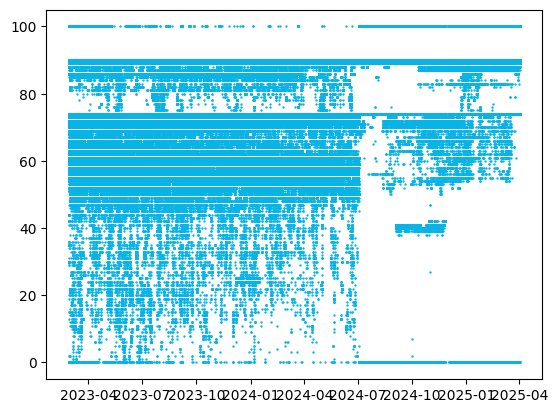

In [29]:
# Lets re-visualise the filllevel
x = bin_sensor_and_oob_df["time"]
y = bin_sensor_and_oob_df["filllevel"]
plt.scatter(x, y, s=0.5,color='#08b3e5')
plt.show() 

# To do - create categories for the fill levels

## cleaned

In [30]:
print("Bin data")
print("are any values null-->",bin_sensor_and_oob_df.isnull().values.any())
print("-------------------------------------------------------------------------------------")
print("Pedestrian data")
print("are any values null-->",pedestrian_counting_df.isnull().values.any())
print("-------------------------------------------------------------------------------------")

Bin data
are any values null--> True
-------------------------------------------------------------------------------------
Pedestrian data
are any values null--> False
-------------------------------------------------------------------------------------


Now that we have cleaned our dataset we can move onto the next stage of the use case, the actual analysis.
## 4 Investigation and Visualisation

### TO DO
Next steps:
- Bin usage
    - Average bin use
    - Most used bins
    - When are they full
    - when emptied
- Pedestrian data
    - Most frequent times
    - Least frequent times
    - Most and least busy times
- Compare times
    - Pedestrian times vs bin full times
    - Are bins down when pedestrian numbers are up
- Conclusion